# Extracting Mech Test Data and reducing number of data points

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import pathlib
from pathlib import Path
import math
import scipy
from scipy.signal import savgol_filter, find_peaks
import os
import glob
from datetime import datetime


In [5]:
filename = 'ave_data.csv'

folder_path = r'C:\Users\mbgm4fs3\OneDrive - The University of Manchester\PhD\Experimental\Data\2. Modelling\FEBIO'

file_path = Path(folder_path) / filename

In [ ]:
# extract data from csv file
column_names = ['Time (s)', 'Load (N)']

df_400 = pd.read_csv(file_path, skiprows=3, usecols=[4,5], header=None, names=column_names)

df_800 = pd.read_csv(file_path, skiprows=3, usecols=[14,15], header=None, names=column_names)



   Time (s)  Load (N)
0  0.000000 -0.009944
1  0.065820 -0.011079
2  0.131639 -0.012209
3  0.197459 -0.013331
4  0.263278 -0.014447


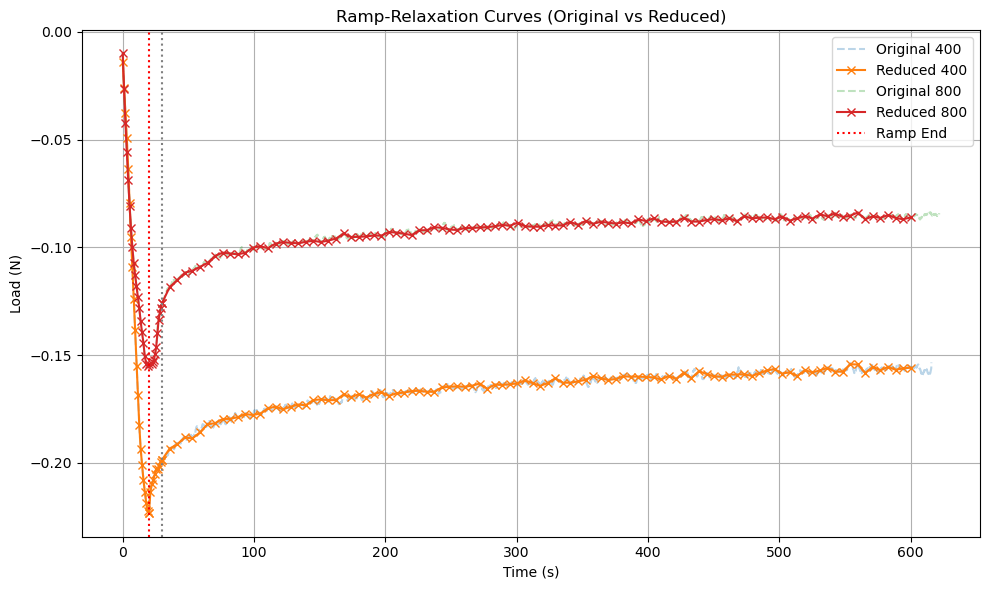

In [ ]:

def reduce_segment(df, start_time, end_time, n_points):
    segment = df[(df['Time (s)'] >= start_time) & (df['Time (s)'] <= end_time)]
    if len(segment) <= n_points:
        return segment  # Nothing to reduce
    indices = np.linspace(0, len(segment) - 1, n_points).astype(int)
    return segment.iloc[indices]

# Reduce df_400
ramp_400 = reduce_segment(df_400, 0, 20, 20)
early_relax_400 = reduce_segment(df_400, 20, 30, 10)
late_relax_400 = reduce_segment(df_400, 30, 600, 100)
df_400_reduced = pd.concat([ramp_400, early_relax_400, late_relax_400], ignore_index=True)
df_400_reduced = df_400_reduced.sort_values('Time (s)').reset_index(drop=True)

# Reduce df_800
ramp_800 = reduce_segment(df_800, 0, 20, 20)
early_relax_800 = reduce_segment(df_800, 20, 30, 10)
late_relax_800 = reduce_segment(df_800, 30, 600, 100)
df_800_reduced = pd.concat([ramp_800, early_relax_800, late_relax_800], ignore_index=True)
df_800_reduced = df_800_reduced.sort_values('Time (s)').reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_400['Time (s)'], df_400['Load (N)'], alpha=0.3, label='Original 400', linestyle='--')
plt.plot(df_400_reduced['Time (s)'], df_400_reduced['Load (N)'], label='Reduced 400', marker='x')

plt.plot(df_800['Time (s)'], df_800['Load (N)'], alpha=0.3, label='Original 800', linestyle='--')
plt.plot(df_800_reduced['Time (s)'], df_800_reduced['Load (N)'], label='Reduced 800', marker='x')

plt.axvline(20, color='red', linestyle=':', label='Ramp End')
plt.axvline(30, color='gray', linestyle=':')

plt.xlabel('Time (s)')
plt.ylabel('Load (N)')
plt.title('Ramp-Relaxation Curves (Original vs Reduced)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()